# NegotiationGPT: Model Performance Visualizations

This notebook creates visualizations for comparing our two model architectures:
1. **Custom Transformer (GPT-style)** - Trained from scratch
2. **BERT/RoBERTa** - Transfer learning with LoRA

Both models were tested with single and ensemble configurations.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


## Model Performance Data

Results from our experiments:


In [30]:
# Model performance data - FINAL RESULTS
data = {
    'Model': ['Custom GPT\n(Single)', 'Custom GPT\n(Ensemble)', 'BERT/RoBERTa\n(Single)', 'BERT/RoBERTa\n(Ensemble)'],
    'Validation Accuracy': [51.19, 51.86, 62.37, 57.90],
    'Test Accuracy': [44.0, 44.30, 45.28, 55.97],  # All models now have test accuracy!
    'Training Accuracy': [99.0, 95.0, 83.10, 75.0],  # Single BERT reached 83.1% at epoch 10
    'Optuna Trials': [50, 50, 25, 25]
}

df = pd.DataFrame(data)
print("Model Performance Summary:")
print(df.to_string(index=False))

# Random baseline
random_baseline = 100 / 27  # 3.7% for 27 classes
print(f"\nRandom Baseline: {random_baseline:.2f}%")

# Key insight
print("\n⚠️ KEY FINDING: Single BERT has HIGHEST validation (62.37%) but LOWEST test (45.28%)!")
print("   This shows overfitting to the validation conversation.")


Model Performance Summary:
                   Model  Validation Accuracy  Test Accuracy  Training Accuracy  Optuna Trials
    Custom GPT\n(Single)                51.19          44.00               99.0             50
  Custom GPT\n(Ensemble)                51.86          44.30               95.0             50
  BERT/RoBERTa\n(Single)                62.37          45.28               83.1             25
BERT/RoBERTa\n(Ensemble)                57.90          55.97               75.0             25

Random Baseline: 3.70%

⚠️ KEY FINDING: Single BERT has HIGHEST validation (62.37%) but LOWEST test (45.28%)!
   This shows overfitting to the validation conversation.


## 1. Accuracy Comparison: Custom GPT vs BERT/RoBERTa


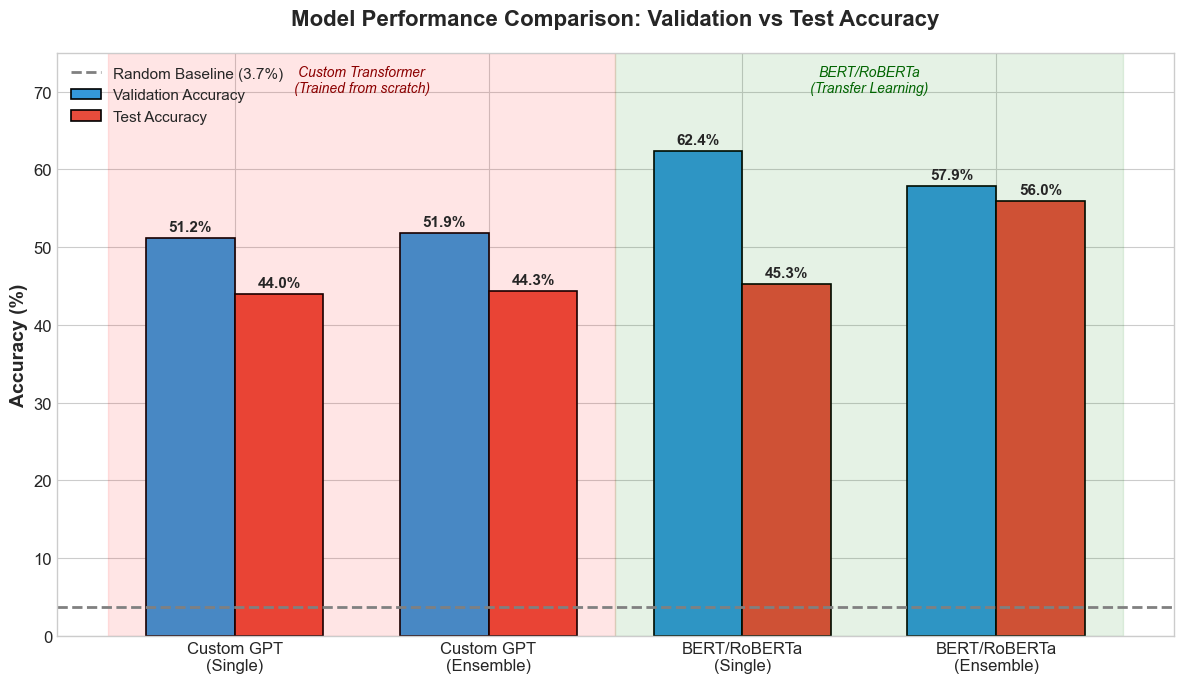

✅ Saved: accuracy_comparison.png


In [31]:
# Accuracy comparison bar chart - FINAL RESULTS
fig, ax = plt.subplots(figsize=(12, 7))

models = ['Custom GPT\n(Single)', 'Custom GPT\n(Ensemble)', 'BERT/RoBERTa\n(Single)', 'BERT/RoBERTa\n(Ensemble)']
val_acc = [51.19, 51.86, 62.37, 57.90]
test_acc = [44.0, 44.30, 45.28, 55.97]  # All models now have actual test accuracy!

x = np.arange(len(models))
width = 0.35

# Create bars
bars1 = ax.bar(x - width/2, val_acc, width, label='Validation Accuracy', color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='#e74c3c', edgecolor='black', linewidth=1.2)

# Add random baseline line
ax.axhline(y=3.7, color='gray', linestyle='--', linewidth=2, label=f'Random Baseline (3.7%)')

# Customize
ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison: Validation vs Test Accuracy', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.set_ylim(0, 75)

# Add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

add_labels(bars1)
add_labels(bars2)

# Add background colors to distinguish model types
ax.axvspan(-0.5, 1.5, alpha=0.1, color='red', label='_nolegend_')
ax.axvspan(1.5, 3.5, alpha=0.1, color='green', label='_nolegend_')

# Add annotations
ax.annotate('Custom Transformer\n(Trained from scratch)', xy=(0.5, 70), ha='center', fontsize=10, style='italic', color='darkred')
ax.annotate('BERT/RoBERTa\n(Transfer Learning)', xy=(2.5, 70), ha='center', fontsize=10, style='italic', color='darkgreen')

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: accuracy_comparison.png")


## 2. Overfitting Analysis: Train vs Test Gap


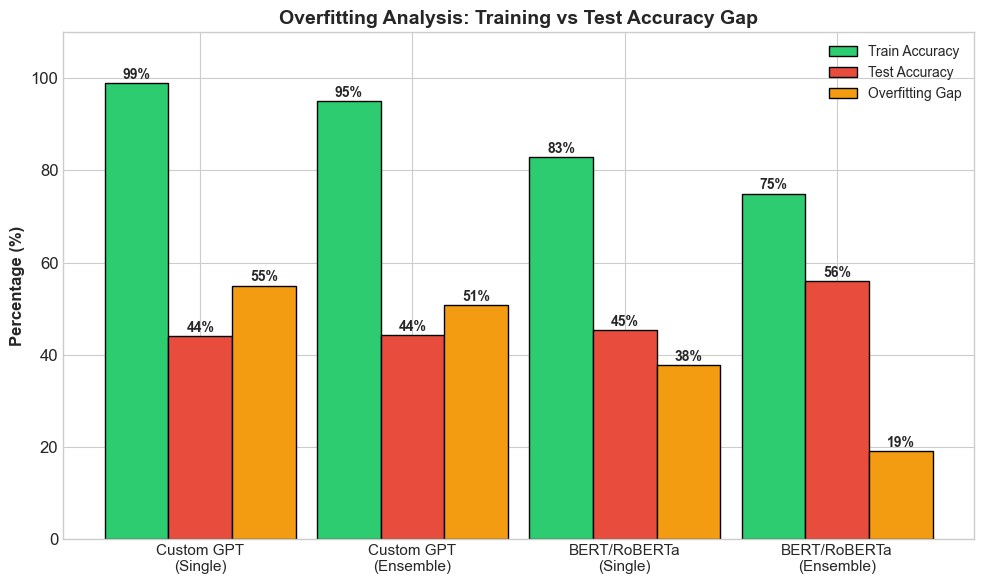

✅ Saved: overfitting_analysis.png


In [32]:
# Overfitting gap visualization
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Custom GPT\n(Single)', 'Custom GPT\n(Ensemble)', 'BERT/RoBERTa\n(Single)', 'BERT/RoBERTa\n(Ensemble)']
train_acc = [99, 95, 83, 75]
test_acc = [44, 44.3, 45.28, 55.97]
gap = [55, 50.7, 37.72, 19.03]  # train - test

x = np.arange(len(models))
width = 0.3

bars1 = ax.bar(x - width, train_acc, width, label='Train Accuracy', color='#2ecc71', edgecolor='black')
bars2 = ax.bar(x, test_acc, width, label='Test Accuracy', color='#e74c3c', edgecolor='black')
bars3 = ax.bar(x + width, gap, width, label='Overfitting Gap', color='#f39c12', edgecolor='black')

ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Overfitting Analysis: Training vs Test Accuracy Gap', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(fontsize=10)
ax.set_ylim(0, 110)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('overfitting_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: overfitting_analysis.png")


## 3. Improvement from Custom GPT to BERT


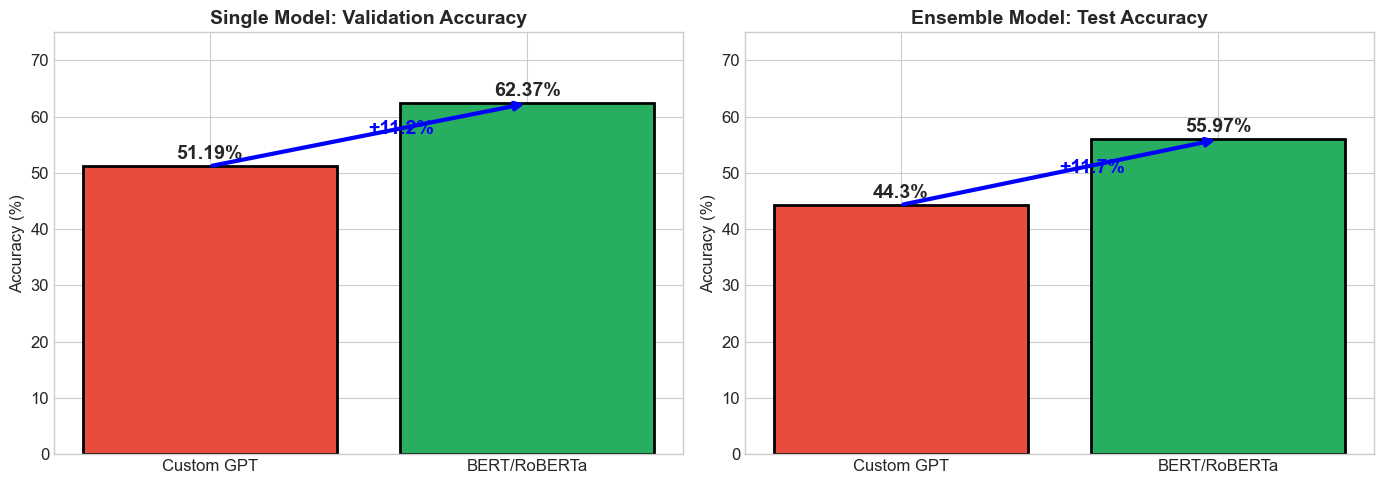

✅ Saved: improvement_comparison.png


In [33]:
# Improvement visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Single model comparison
ax1 = axes[0]
categories = ['Custom GPT', 'BERT/RoBERTa']
single_val = [51.19, 62.37]
colors = ['#e74c3c', '#27ae60']
bars = ax1.bar(categories, single_val, color=colors, edgecolor='black', linewidth=2)
ax1.set_title('Single Model: Validation Accuracy', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.set_ylim(0, 75)
for bar, val in zip(bars, single_val):
    ax1.annotate(f'{val}%', xy=(bar.get_x() + bar.get_width()/2, val),
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=14, fontweight='bold')
# Add improvement arrow
ax1.annotate('', xy=(1, 62.37), xytext=(0, 51.19),
            arrowprops=dict(arrowstyle='->', color='blue', lw=3))
ax1.annotate('+11.2%', xy=(0.5, 57), fontsize=14, fontweight='bold', color='blue')

# Ensemble comparison
ax2 = axes[1]
ensemble_test = [44.30, 55.97]
bars = ax2.bar(categories, ensemble_test, color=colors, edgecolor='black', linewidth=2)
ax2.set_title('Ensemble Model: Test Accuracy', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_ylim(0, 75)
for bar, val in zip(bars, ensemble_test):
    ax2.annotate(f'{val}%', xy=(bar.get_x() + bar.get_width()/2, val),
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=14, fontweight='bold')
ax2.annotate('', xy=(1, 55.97), xytext=(0, 44.30),
            arrowprops=dict(arrowstyle='->', color='blue', lw=3))
ax2.annotate('+11.7%', xy=(0.5, 50), fontsize=14, fontweight='bold', color='blue')

plt.tight_layout()
plt.savefig('improvement_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: improvement_comparison.png")


## 4. Data Split Visualization


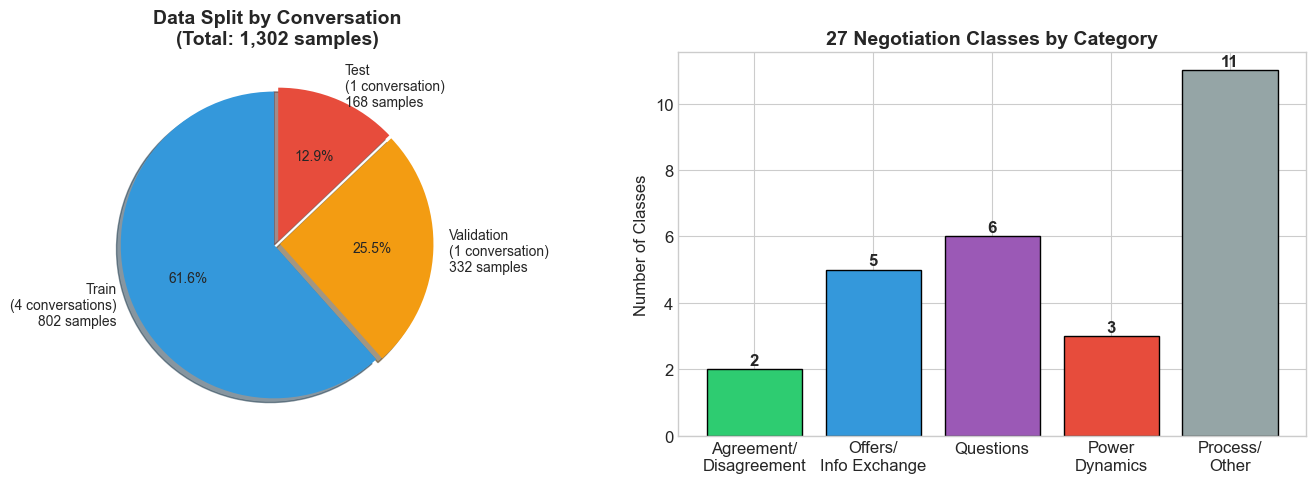

✅ Saved: data_overview.png


In [34]:
# Data split pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Data split
ax1 = axes[0]
sizes = [802, 332, 168]
labels = ['Train\n(4 conversations)\n802 samples', 'Validation\n(1 conversation)\n332 samples', 'Test\n(1 conversation)\n168 samples']
colors = ['#3498db', '#f39c12', '#e74c3c']
explode = (0.02, 0.02, 0.02)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 10})
ax1.set_title('Data Split by Conversation\n(Total: 1,302 samples)', fontsize=14, fontweight='bold')

# 27 classes visualization (simplified)
ax2 = axes[1]
class_categories = ['Agreement/\nDisagreement', 'Offers/\nInfo Exchange', 'Questions', 'Power\nDynamics', 'Process/\nOther']
class_counts = [2, 5, 6, 3, 11]  # Approximate distribution of 27 classes
colors2 = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#95a5a6']
bars = ax2.bar(class_categories, class_counts, color=colors2, edgecolor='black')
ax2.set_title('27 Negotiation Classes by Category', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Classes', fontsize=12)
for bar, val in zip(bars, class_counts):
    ax2.annotate(f'{val}', xy=(bar.get_x() + bar.get_width()/2, val),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('data_overview.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: data_overview.png")


## 5. Summary: Key Takeaways


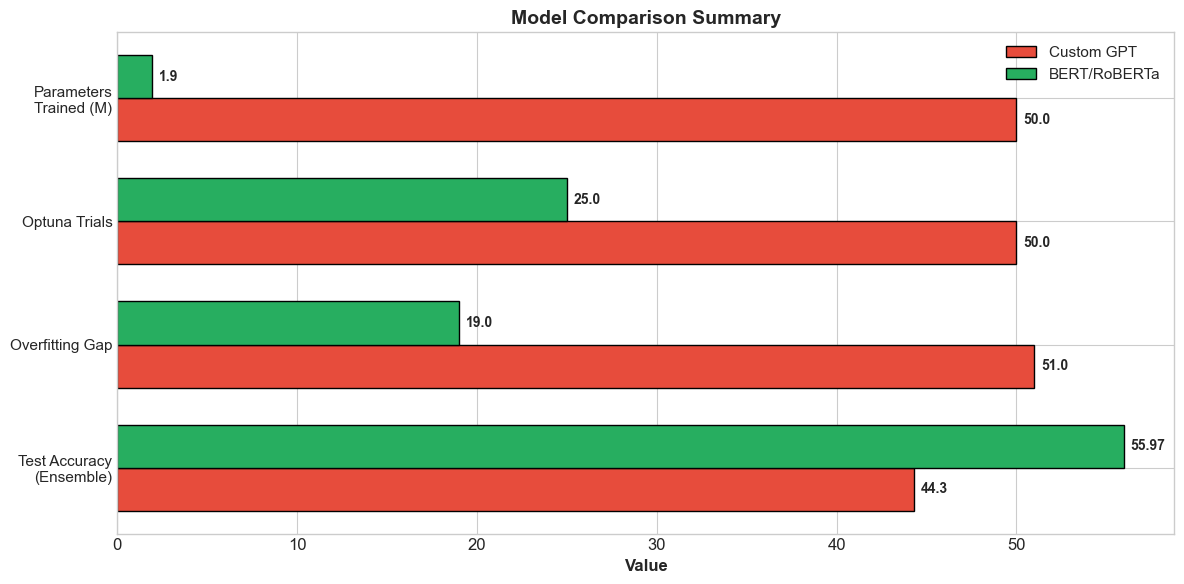

✅ Saved: summary_comparison.png

📊 ALL VISUALIZATIONS CREATED!

Files saved:
  1. accuracy_comparison.png
  2. overfitting_analysis.png
  3. improvement_comparison.png
  4. data_overview.png
  5. summary_comparison.png

You can use these images in your presentation!


In [35]:
# Summary comparison - horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['Test Accuracy\n(Ensemble)', 'Overfitting Gap', 'Optuna Trials', 'Parameters\nTrained (M)']
gpt_values = [44.3, 51, 50, 50]  # 50M params for custom
bert_values = [55.97, 19, 25, 1.9]  # 1.9M params for BERT (LoRA)

y = np.arange(len(metrics))
height = 0.35

bars1 = ax.barh(y - height/2, gpt_values, height, label='Custom GPT', color='#e74c3c', edgecolor='black')
bars2 = ax.barh(y + height/2, bert_values, height, label='BERT/RoBERTa', color='#27ae60', edgecolor='black')

ax.set_xlabel('Value', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison Summary', fontsize=14, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(5, 0), textcoords="offset points", ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('summary_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: summary_comparison.png")

print("\n" + "="*60)
print("📊 ALL VISUALIZATIONS CREATED!")
print("="*60)
print("\nFiles saved:")
print("  1. accuracy_comparison.png")
print("  2. overfitting_analysis.png")
print("  3. improvement_comparison.png")
print("  4. data_overview.png")
print("  5. summary_comparison.png")
print("\nYou can use these images in your presentation!")


## 6. Key Finding: Single BERT Overfitting

**Important Discovery:** Single BERT achieved the highest validation accuracy (62.37%) but the **lowest test accuracy (45.28%)**! This demonstrates overfitting to the validation conversation.


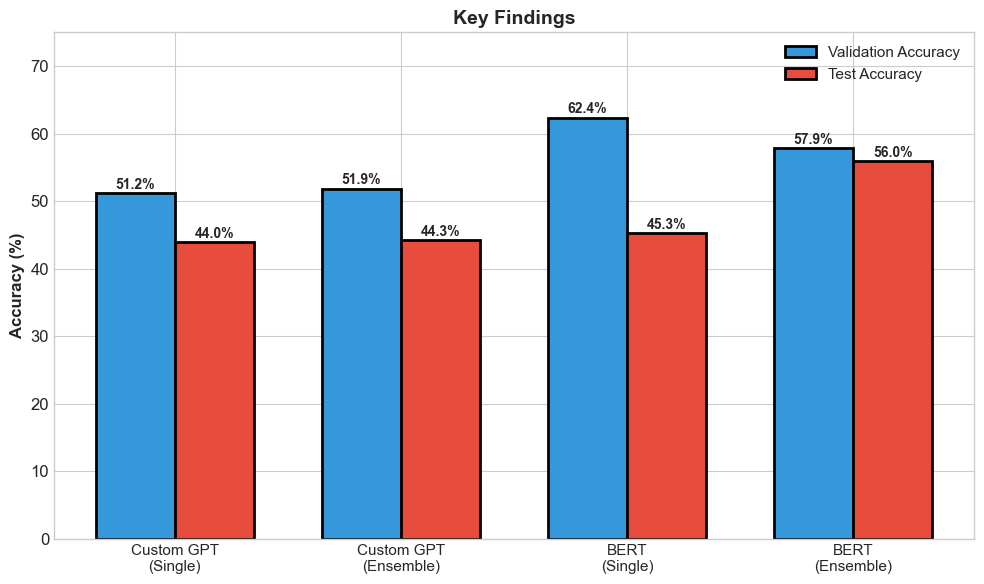

✅ Saved: validation_vs_test_finding.png


In [36]:
# Validation vs Test - The Overfitting Story
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Custom GPT\n(Single)', 'Custom GPT\n(Ensemble)', 'BERT\n(Single)', 'BERT\n(Ensemble)']
val_acc = [51.19, 51.86, 62.37, 57.90]
test_acc = [44.0, 44.30, 45.28, 55.97]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, val_acc, width, label='Validation Accuracy', color='#3498db', edgecolor='black', linewidth=2)
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='#e74c3c', edgecolor='black', linewidth=2)

ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Key Findings', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0, 75)

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax.annotate(f'{val_acc[i]:.1f}%', xy=(bar1.get_x() + bar1.get_width()/2, val_acc[i]),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')
    ax.annotate(f'{test_acc[i]:.1f}%', xy=(bar2.get_x() + bar2.get_width()/2, test_acc[i]),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('validation_vs_test_finding.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: validation_vs_test_finding.png")
